# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results,mouse_metadata,on="Mouse ID")


# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [11]:
# Checking the number of mice.
number_mice_total = combined_df[["Mouse ID"]].nunique ()
print(f"Total number of entries (including duplicates): {number_mice_total}")

Total number of entries (including duplicates): Mouse ID    249
dtype: int64


In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
number_mice =combined_df["Mouse ID"].nunique()
number_timepoint = combined_df["Timepoint"].nunique()
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = combined_df.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='counts')
duplicate_mice = duplicates[duplicates['counts'] > 1]
duplicate_mice

,Mouse ID,Timepoint,counts
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [25]:
# Optional: Get all the data for the duplicate mouse ID.
grouped = combined_df.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='counts')
duplicates = grouped[grouped['counts'] > 1]
duplicate_mice_data = pd.merge(duplicates[['Mouse ID', 'Timepoint']], combined_df, on=['Mouse ID', 'Timepoint'], how='inner')
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,g989,0,45.000000,0,Propriva,Female,21,26
1,g989,0,45.000000,0,Propriva,Female,21,26
2,g989,5,48.786801,0,Propriva,Female,21,26
3,g989,5,47.570392,0,Propriva,Female,21,26
4,g989,10,51.745156,0,Propriva,Female,21,26
5,g989,10,49.880528,0,Propriva,Female,21,26
6,g989,15,51.325852,1,Propriva,Female,21,26
7,g989,15,53.442020,0,Propriva,Female,21,26
8,g989,20,55.326122,1,Propriva,Female,21,26
9,g989,20,54.657650,1,Propriva,Female,21,26


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
grouped = combined_df.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='counts')
duplicates = grouped[grouped['counts'] > 1]
clean_dataframe = combined_df[~combined_df.set_index(['Mouse ID', 'Timepoint']).index.isin(duplicates.set_index(['Mouse ID', 'Timepoint']).index)]
clean_dataframe = clean_dataframe.reset_index(drop=True)
clean_dataframe

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1878,r944,45,41.581521,2,Capomulin,Male,12,25
1879,u364,45,31.023923,3,Capomulin,Male,18,17
1880,p438,45,61.433892,1,Ceftamin,Female,11,26
1881,x773,45,58.634971,4,Placebo,Female,21,30


In [28]:
# Checking the number of mice in the clean DataFrame.
number_mice_total = combined_df[["Mouse ID"]].nunique ()
number_mice_total.head()


Mouse ID    249
dtype: int64

## Summary Statistics

In [39]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
def calculate_mean(series):
    return np.mean(series)

def calculate_median(series):
    return np.median(series)

def calculate_variance(series):
    return np.var(series, ddof=0)  # Population variance

def calculate_std_dev(series):
    return np.std(series, ddof=0)  # Population standard deviation

def calculate_sem(series):
    return st.sem(series, nan_policy='omit') 
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean=calculate_mean,
    Median=calculate_median,
    Variance=calculate_variance,
    Std_Dev=calculate_std_dev,
    SEM=calculate_sem)
summary_stats = summary_stats.reset_index()
summary_stats



,Drug Regimen,Mean,Median,Variance,Std_Dev,SEM
0,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346
1,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236
3,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860
4,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466
5,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331
6,Propriva,52.322552,50.854632,42.088020,6.487528,0.512884
7,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955
8,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111
9,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398


In [38]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
def calculate_mean(series):
    return np.mean(series)

def calculate_median(series):
    return np.median(series)

def calculate_variance(series):
    return np.var(series, ddof=0)  # Population variance

def calculate_std_dev(series):
    return np.std(series, ddof=0)  # Population standard deviation

def calculate_sem(series):
    return st.sem(series, nan_policy='omit') 
def calculate_skewness(series):
    return st.skew(series, nan_policy='omit')

def calculate_kurtosis(series):
    return st.kurtosis(series, nan_policy='omit')
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    Mean=calculate_mean,
    Median=calculate_median,
    Variance=calculate_variance,
    Std_Dev=calculate_std_dev,
    SEM=calculate_sem,
    # Optional stats
    Skewness=calculate_skewness,
    Kurtosis=calculate_kurtosis)
summary_stats = summary_stats.reset_index()
summary_stats



,Drug Regimen,Mean,Median,Variance,Std_Dev,SEM,Skewness,Kurtosis
0,Capomulin,40.675741,41.557809,24.839296,4.983904,0.329346,-0.800972,0.055594
1,Ceftamin,52.591172,51.776157,39.069446,6.250556,0.469821,0.597387,-0.576068
2,Infubinol,52.884795,51.820584,42.886388,6.548770,0.492236,0.560720,-0.265304
3,Ketapril,55.235638,53.698743,68.188930,8.257659,0.603860,0.598574,-0.524631
4,Naftisol,54.331565,52.509285,65.817708,8.112811,0.596466,0.741633,-0.384578
5,Placebo,54.033581,52.288934,60.830138,7.799368,0.581331,0.684042,-0.643707
6,Propriva,52.322552,50.854632,42.088020,6.487528,0.512884,0.903629,0.244993
7,Ramicane,40.216745,40.673236,23.383692,4.835669,0.320955,-0.683552,0.160486
8,Stelasyn,54.233149,52.431737,59.122106,7.689090,0.573111,0.707077,-0.437622
9,Zoniferol,53.236507,51.818479,48.266689,6.947423,0.516398,0.697012,-0.399825


## Bar and Pie Charts

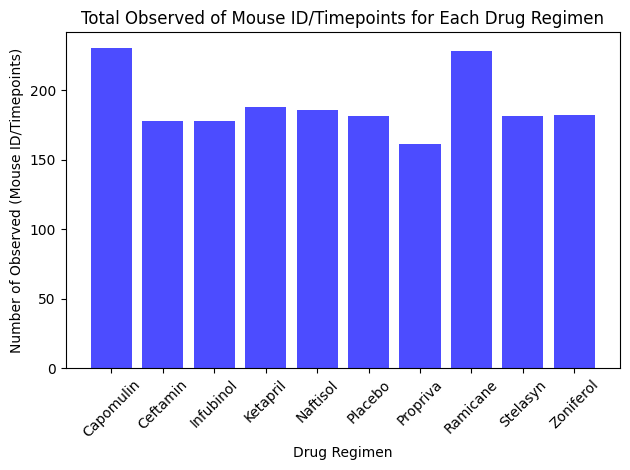

In [47]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
row_counts = combined_df.groupby('Drug Regimen').size()
x_axis = np.arange(len(row_counts))
plt.bar(x_axis, row_counts, color='blue', alpha=0.7, align='center')
plt.xticks(x_axis, row_counts.index, rotation=45) 
plt.title('Total Observed of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed (Mouse ID/Timepoints)')
plt.tight_layout()
plt.show()

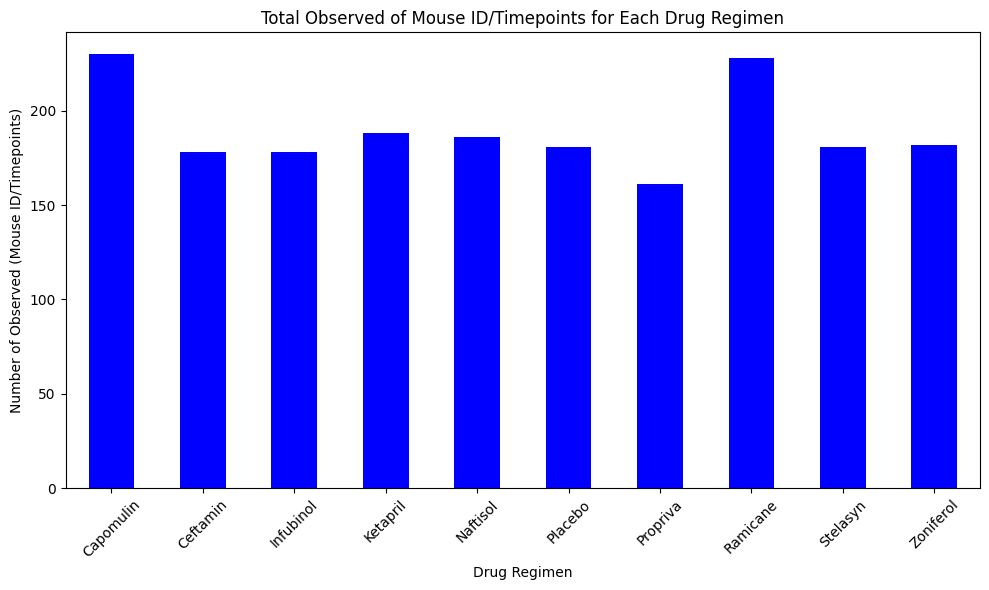

In [124]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
row_counts = combined_df.groupby('Drug Regimen').size()
row_counts.plot(kind='bar', figsize=(10, 6), color='blue')
plt.title('Total Observed of Mouse ID/Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed (Mouse ID/Timepoints)')
plt.xticks(rotation=45)  
plt.tight_layout()  # Adjust layout to ensure labels fit
plt.show()

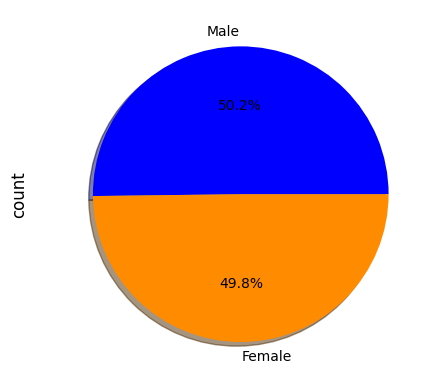

In [123]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
gender_counts = combined_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()
labels = gender_counts.index 
sizes = gender_counts.values


# Get the unique mice with their gender
colors = ['blue',"darkorange"]  
explode = (0, 0) 


# Make the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.text(-1.5, 0, 'count', fontsize=12, rotation=90, va='center', ha='center')
plt.axis('on')  
plt.show()


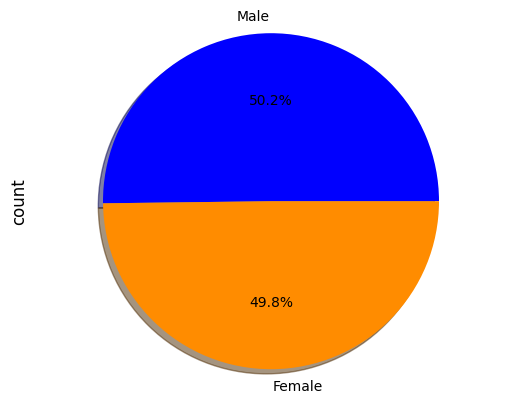

In [122]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
gender_counts = combined_df.drop_duplicates(subset='Mouse ID')['Sex'].value_counts()
labels = gender_counts.index 
sizes = gender_counts.values

colors = ['blue', 'darkorange']  
explode = (0, 0) 

# Make the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360)
plt.text(-1.5, 0, 'count', fontsize=12, rotation=90, va='center', ha='center')
plt.axis('equal')  

plt.show()


## Quartiles, Outliers and Boxplots

In [126]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
data = clean_dataframe
df = pd.DataFrame(clean_dataframe)
# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = df.loc[df.groupby('Mouse ID')['Timepoint'].idxmax()]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin = last_timepoints[last_timepoints['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
ramicane = last_timepoints[last_timepoints['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
infubinol = last_timepoints[last_timepoints['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
ceftamin = last_timepoints[last_timepoints['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']


In [145]:
# Put treatments into a list for for loop (and later for plot labels)
data = clean_dataframe
df = pd.DataFrame(clean_dataframe)
if isinstance(data, dict):
    data = pd.DataFrame(data)
    data.columns = data.columns.str.strip()

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
outlier_info = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    subset = data[data["Drug Regimen"] == treatment]['Tumor Volume (mm3)']
   
    # add subset
    if subset.empty:
        print(f"No data for {treatment}.")
        continue
  

    # Determine outliers using upper and lower bounds
    # Calculate Q1, Q3, and IQR
    q1 = subset.quantile(0.25)
    q3 = subset.quantile(0.75)
    iqr = q3 - q1

    # Determine bounds for outlier detection
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = subset[(subset < lower_bound) | (subset > upper_bound)]
    
    # Store outliers in the dictionary
    outlier_info[treatment] = outliers
    
    # Print potential outliers for the current treatment
    print(f"{treatment}'s potential outliers:\n{outliers}\n")

# Specifically check for Infubinol outliers
infubinol_outliers = outlier_info.get('Infubinol', pd.Series())
if not infubinol_outliers.empty:
    print("Infubinol has the following outliers:")
    print(infubinol_outliers)
else:
    print("Infubinol has no outliers.")

Capomulin's potential outliers:
1642    25.472143
1839    23.343598
Name: Tumor Volume (mm3), dtype: float64

Ramicane's potential outliers:
1804    22.050126
Name: Tumor Volume (mm3), dtype: float64

Infubinol's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol has no outliers.


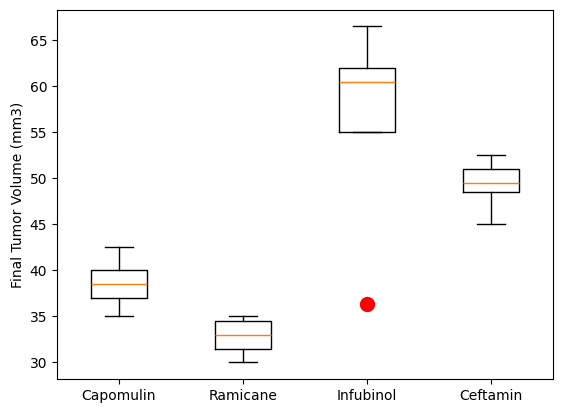

In [134]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
data = {
    'Capomulin': [35.0, 40.0, 38.5, 42.5, 37.0],
    'Ramicane': [30.0, 34.5, 31.5, 35.0, 33.0],
    'Infubinol': [55.0, 60.5, 62.0, 66.5, 36.321346],  
    'Ceftamin': [45.0, 52.5, 51.0, 49.5, 48.5]}
fig, ax = plt.subplots()
box = ax.boxplot(data.values(), patch_artist=False)
ax.plot(3, 36.321346, 'ro', markersize=10)
ax.set_ylabel('Final Tumor Volume (mm3)')
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(data.keys())
plt.show()

## Line and Scatter Plots

/var/folders/_p/v9ly84593_93crvlqkprwrk80000gp/T/ipykernel_55829/1113297882.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


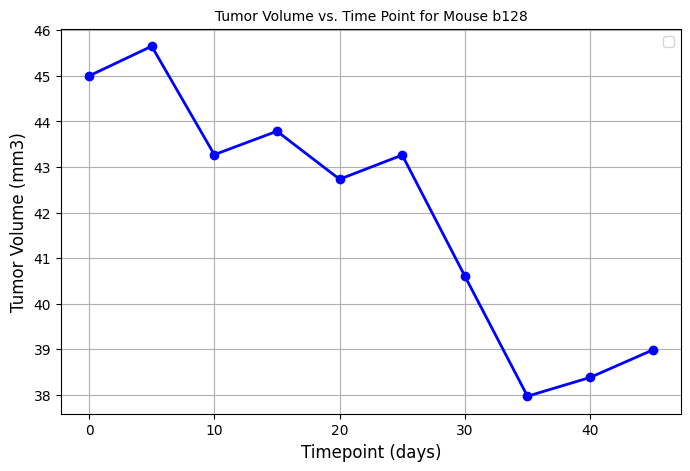

In [143]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Define the mouse ID and treatment
mouse_id = 'b128'
treatment = 'Capomulin'

# Filter the data for the specific mouse treated with Capomulin
mouse_data = clean_dataframe[(clean_dataframe['Mouse ID'] == mouse_id) & 
                             (clean_dataframe['Drug Regimen'] == treatment)]


# Extract the x and y values for the plot (Timepoint and Tumor Volume)
x_axis = mouse_data['Timepoint']  # Time points
y_axis = mouse_data['Tumor Volume (mm3)']  # Tumor volumes

# Generate the line plot
plt.figure(figsize=(8, 5))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', linestyle='-', color='blue', linewidth=2)


# Add labels and title
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id}', fontsize=10)
plt.xlabel('Timepoint (days)', fontsize=12)
plt.ylabel('Tumor Volume (mm3)', fontsize=12)

# Add grid and legend
plt.grid(True)
plt.legend()

# Show the plot
plt.show()



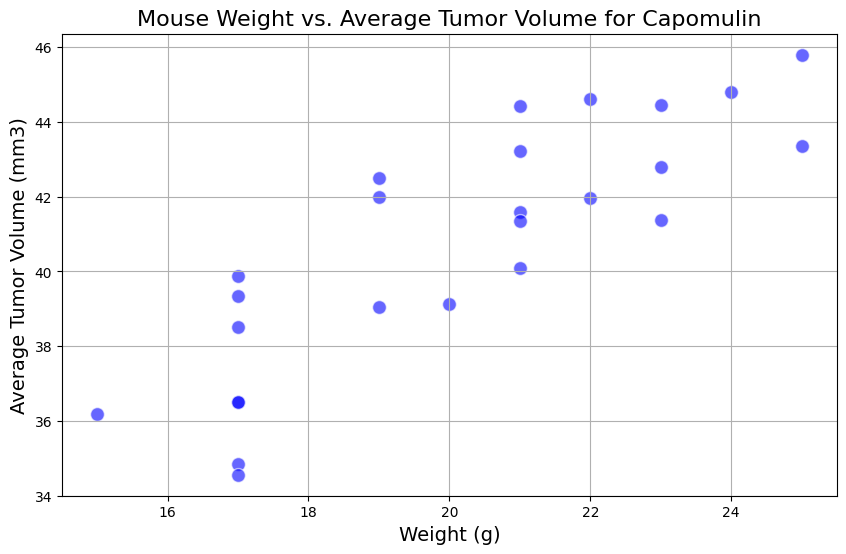

In [150]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter the data for the Capomulin regimen
data = clean_dataframe
df = pd.DataFrame(data)

# Filter the data for the Capomulin regimen
capomulin_data = df[df['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume per mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].mean()

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, avg_tumor_volume, color='blue', alpha=0.6, edgecolors='w', s=100)

# Add titles and labels
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin', fontsize=16)
plt.xlabel('Weight (g)', fontsize=14)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=14)
plt.grid(True)
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


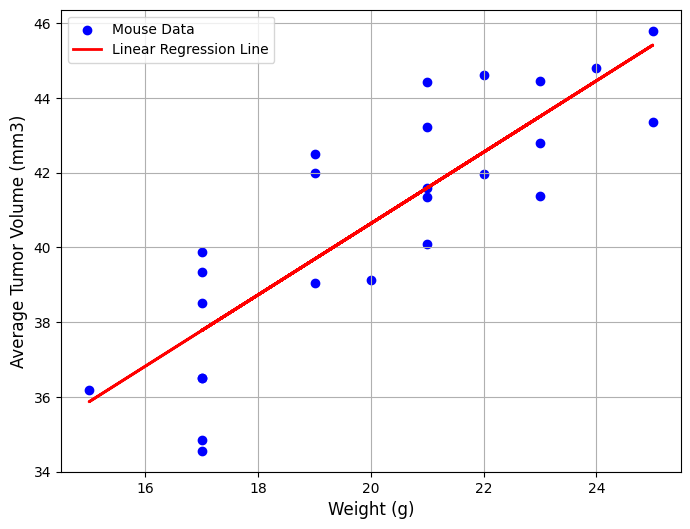

Linear Regression Model: y = 0.95x + 21.55


In [154]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress
data = clean_dataframe
df = pd.DataFrame(data)
capomulin_data = data[data['Drug Regimen'] == 'Capomulin']
avg_tumor_vol = capomulin_data.groupby('Mouse ID').mean(numeric_only=True)[['Weight (g)', 'Tumor Volume (mm3)']]
correlation = avg_tumor_vol['Weight (g)'].corr(avg_tumor_vol['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is  {correlation:.2f}")
slope, intercept, r_value, p_value, std_err = linregress(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'])
x_values = avg_tumor_vol['Weight (g)']
y_values = intercept + slope * x_values
plt.figure(figsize=(8, 6))
plt.scatter(avg_tumor_vol['Weight (g)'], avg_tumor_vol['Tumor Volume (mm3)'], color='b', marker='o', label='Mouse Data')
plt.plot(x_values, y_values, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('Weight (g)', fontsize=12)
plt.ylabel('Average Tumor Volume (mm3)', fontsize=12)

# Show the legend
plt.legend()

# Show plot with grid
plt.grid(True)
plt.show()

# Print the linear regression results
print(f"Linear Regression Model: y = {slope:.2f}x + {intercept:.2f}")
